<function matplotlib.pyplot.show(*args, **kw)>

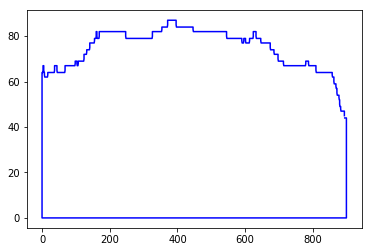

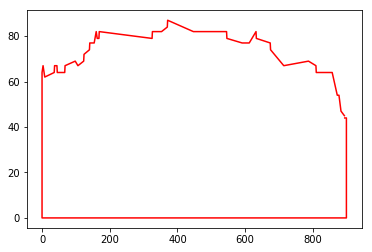

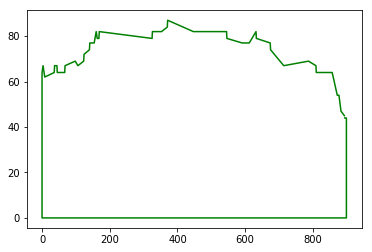

In [174]:
import json 
import numpy as np
import matplotlib.pyplot as plt
from simplification.cutil import simplify_coords, simplify_coords_vw

with open('deepak_test.json') as f:

    data = json.load(f)

size = 0
list_no = 0
size += len(data["anatomy"]["Bone"]["geometry"][list_no])

xy_array = np.zeros((1, size* 2))
index = 0


for j in range (len(data["anatomy"]["Bone"]["geometry"][list_no])):
        xy_array[0][index] = data["anatomy"]["Bone"]["geometry"][list_no][j]['x']
        index += 1
        xy_array[0][index] = data["anatomy"]["Bone"]["geometry"][list_no][j]['y']
        index += 1

rows = int(xy_array.size / 2)
collumns = 2

xy_array = xy_array.reshape(rows,collumns)

ratio = 0.5 #percentage of points to be included
count = 1 #counting no of iterations for both algorithms

max_num_points = ratio * len(xy_array)
if max_num_points:
                epsilon = 0.001
                simplified = simplify_coords(xy_array,epsilion)
                while len(simplified) > max_num_points:
                    epsilon *= 2
                    count += 1
                    simplified = simplify_coords(simplified, epsilon)

count = 1

max_num_points = ratio * len(xy_array)
if max_num_points:
                area = 0.001
                simplified_vw = simplify_coords_vw(xy_array,area)
                while len(simplified_vw) > max_num_points:
                    area *= 2
                    count += 1
                    simplified_vw = simplify_coords(simplified_vw, area)
                    

plt.figure(1)
plt.plot(xy_array[:,0], xy_array[:,1],"b")  #Orignal Shape
plt.show

plt.figure(2)
plt.plot(simplified[:,0], simplified[:,1],"r") #Modified Shape via  Douglas-pueker algorithm 
plt.show

plt.figure(3)
plt.plot(simplified_vw[:,0], simplified_vw[:,1],"g") #Modifies Shape via viswalingam algorithm
plt.show